### Exercise 1: Titanic Dataset - ROC AUC with KNN
1. Load the Titanic dataset.
2. Select relevant columns: 'Survived', 'Age', 'Fare', 'Sex', 'Pclass'.
3. Drop rows with missing values.
4. Encode the 'Sex' column into numerical values (0 for female, 1 for male).
5. Split the data into features (X) and target (y).
6. Split the data into training and testing sets (e.g., 80% training, 20% testing).
7. Create a KNeighborsClassifier with default settings.
8. Fit the KNN classifier on the training data.
9. Use the KNN classifier to predict probabilities for the positive class (survived) on the test
data.
10. Calculate the ROC AUC score using the predicted probabilities and the actual labels from
the test set by rerunning the steps 6 to 9.
11. Visualize the ROC AUC scores.

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.metrics import confusion_matrix
#Load the Titanic dataset.
titanic_df= pd.read_csv('titanic.csv')
print(titanic_df.shape)
#Select relevant columns: 'Survived', 'Age', 'Fare', 'Sex', 'Pclass'.
selected_columns = ['Survived', 'Age', 'Fare', 'Sex', 'Pclass']
titanic_df = titanic_df[selected_columns]
print(f'number of null values: {titanic_df.isnull().sum().sum()}')
# Drop rows with missing values.
titanic_df = titanic_df.dropna()
print(titanic_df.shape)
# Encode the 'Sex' column into numerical values (0 for female, 1 for male).
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})
titanic_df


(891, 12)
number of null values: 177
(714, 5)


,Survived,Age,Fare,Sex,Pclass
0,0,22.0,7.2500,1,3
1,1,38.0,71.2833,0,1
2,1,26.0,7.9250,0,3
3,1,35.0,53.1000,0,1
4,0,35.0,8.0500,1,3
...,...,...,...,...,...
885,0,39.0,29.1250,0,3
886,0,27.0,13.0000,1,2
887,1,19.0,30.0000,0,1
889,1,26.0,30.0000,1,1


In [128]:
# Split the data into features (X) and target (y).
X : pd.DataFrame= titanic_df.drop('Survived', axis=1)
y : pd.Series = titanic_df['Survived']
print(f'The features X : {X.shape}')
print(f'The target feature y : {y.shape}')

The features X : (714, 4)
The target feature y : (714,)


In [129]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'The training data : {X_train.shape}')
print(f'The shape of the testing data : {X_test.shape}')

The training data : (571, 4)
The shape of the testing data : (143, 4)


In [130]:
#Create a KNeighborsClassifier with default settings.
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Use the KNN classifier to predict probabilities for the positive class (survived) on the test data
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
y_pred = knn_classifier.predict(X_test)
for i , j in zip(y_prob, y_pred):
    print(f'The proba : {round(i, 2)} -> The label : {j}')

The proba : 0.6 -> The label : 1
The proba : 1.0 -> The label : 1
The proba : 0.8 -> The label : 1
The proba : 0.6 -> The label : 1
The proba : 0.0 -> The label : 0
The proba : 0.4 -> The label : 0
The proba : 0.0 -> The label : 0
The proba : 0.4 -> The label : 0
The proba : 0.2 -> The label : 0
The proba : 0.6 -> The label : 1
The proba : 0.8 -> The label : 1
The proba : 0.8 -> The label : 1
The proba : 1.0 -> The label : 1
The proba : 0.2 -> The label : 0
The proba : 0.8 -> The label : 1
The proba : 0.0 -> The label : 0
The proba : 0.2 -> The label : 0
The proba : 0.8 -> The label : 1
The proba : 0.4 -> The label : 0
The proba : 0.4 -> The label : 0
The proba : 0.2 -> The label : 0
The proba : 0.8 -> The label : 1
The proba : 0.8 -> The label : 1
The proba : 0.8 -> The label : 1
The proba : 0.0 -> The label : 0
The proba : 0.4 -> The label : 0
The proba : 0.2 -> The label : 0
The proba : 0.4 -> The label : 0
The proba : 0.4 -> The label : 0
The proba : 0.2 -> The label : 0
The proba 

In [133]:
score = knn_classifier.score(X_test, y_test)
print(score)

0.6573426573426573


In [131]:
# def get_preds(threshold, probabilities):
#     return [1 if prob > threshold else 0 for prob in probabilities]

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print(f'True Positives: {tp}')
# print(f'False Positives: {fp}')
# print(f'True Negatives: {tn}')
# print(f'False Negatives: {fn}')
# roc_values = []
# for thresh in np.linspace(0, 1, 100):
#     preds = get_preds(thresh, y_prob)
#     tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
#     tpr = tp/(tp+fn)
#     fpr = fp/(fp+tn)
#     roc_values.append([tpr, fpr])
# tpr_values, fpr_values = zip(*roc_values)

ROC AUC Score: 0.6500410509031199


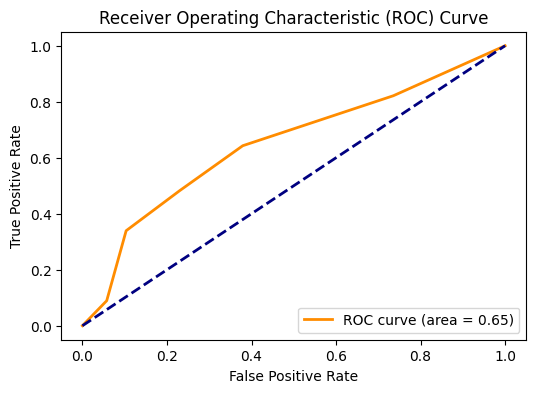

In [132]:

# Calculate the ROC AUC score using the predicted probabilities and the actual labels from the test set


roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc}')

thresh = 0.6

fpr, tpr, thresh = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()